<h3> Badanie składu i szukanie wzorców w sekwencjach biologicznych

- Generowanie losowych sekwencji 

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def textGenerator(length, dist={'A':0.25, 'C':0.25,'G':0.25,'T':0.25}):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej czestosci liter alfabetu'''
    distT = []
    h = 0
    for (k, v) in dist.items():
        h += v
        distT.append((k,h))
    s = ''
    for x in range(length):
        ran = r.random()
        for k,v in distT:
            if ran <= v:
                s+=k
                break
    return s

#przyklad
seq = textGenerator(10)
print(seq)

GTAAGGAGAC


In [54]:
#Bieżący nukleotyd jest zależny od wcześniejszego (model Markowa rzędu 1):

def random2(length, nuc, firstN, trans):
    '''Funkcja zwraca losowa sekwencje o zadanej dlugosci i zadanej macierzy przejsc'''
    s_losowa = ''
    for i in range(length):
        if i>0:
            s_losowa+=np.random.choice(nuc, 1, p=trans[s_losowa[-1]])[0]
        else:
            s_losowa+=np.random.choice(nuc, 1, p=firstN)[0]
    return s_losowa



## przyklad
nuc = ["A","C","G","T"]
trans = {} #macierz przejsc

#              "A",  "C",  "G",  "T"
trans['A'] = [0.25, 0.25, 0.25, 0.25]
trans['C'] = [ 0.0,  1/3,  1/3,  1/3]
trans['G'] = [0.25, 0.25, 0.25, 0.25]
trans['T'] = [0.25, 0.25, 0.25, 0.25]

firstN = [0.25, 0.25, 0.25, 0.25] #piewszy nukleotyd będzie zupelnie losowy

#przyklad
seq = random2(100, nuc, firstN, trans)
print(seq)

ATATTCCTAAGGAGGCCTCTGGTCTTCGGATTGGCTCGTTAGCTCTGCGATGAATCGACTTCCCCCTTACGAGAGCTGACTTTGAGTGCTTAACTCTTAA


 - Proste statystyki dla sekwencji

In [45]:
#Wyznaczanie częstosci nukleotydów i dinukleotydów dla zadanej sekwencji 

#seq=random2(10000, nuc, firstN, trans)

letters = {'A':0, 'C':0, 'G':0, 'T':0}
diplets = {'AG':0, 'GA':0, 'CA':0, 'AC':0, 'GC':0, 'CG':0, 'TA':0,'AT':0,'TG':0, 'GT':0,'CT':0,'TC':0, 'AA':0, 'CC':0, 'GG':0, 'TT':0}

n = len(seq)-1
for i in range(n):
    letters[seq[i]]+=1
    diplets[seq[i:(i+2)]]+=1
letters[seq[n]]+=1


sumL = sum(letters.values())
norL = {k:v/sumL for k,v in letters.items()}
sumD = sum(diplets.values())
norD = {k:v/sumD for k,v in diplets.items()}

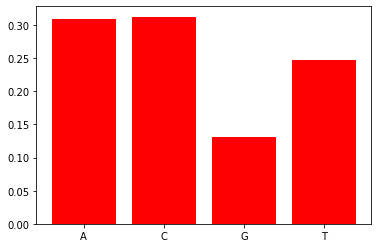

In [46]:
#wizuzalizacja dla nukleotydow

height_norL = norL.values()
bars = norL.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norL,color="red")
plt.xticks(y_pos, bars)
plt.show()

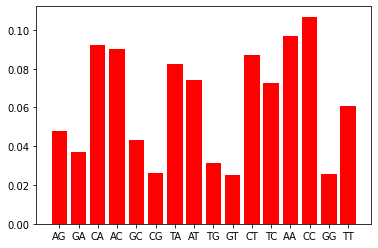

In [47]:
#wizuzalizacja dla dinukleotydow
height_norD = norD.values()
bars = norD.keys()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height_norD,color="red")
plt.xticks(y_pos, bars)
plt.show()

- Reprezentacja gry chaosu

In [9]:
def CGR(seq):
    '''Funkcja wyznacza tzw. reprezentację gry chaosu dla danej sekwencji'''
    d = np.array([0.5,0.5])
    nt= ["A","C","G","T"]
    coordinates = np.array([[0,0],[0,1],[1,0],[1,1]])
    sequence = []
    for i in range(len(seq)):
        x=0.5*(d[len(d)-1]+coordinates[nt.index(seq[i])])
        sequence.append((x[0],x[1]))
        d = np.vstack((d, x))
    return np.array(sequence)

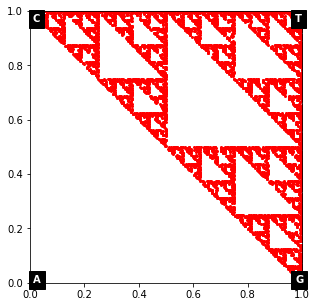

In [58]:
#przykladowe wywolanie tej funkcji i wizualizacja

#seq = "ATGCC"
seq = textGenerator(10000, dist={'A':0, 'C':0.25,'G':0.25,'T':0.25})
p1 = CGR(seq) #wykorzystuje funckje CGR, trzeba ją tez załączyc do kodu

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.scatter(p1[:,0],p1[:,1],c = "red", s = 4, label = "CGR")
#plt.scatter([0.5],[0.5])
ax.text(0.01, 0.03, 'A', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.01, 0.99, 'C', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.03, 'G', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')
ax.text(0.975, 0.99, 'T', transform=ax.transAxes, fontweight='bold', va='top', ha='left',backgroundcolor='k', color='white')

plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("obrazek.png", dpi=300) #Jak chcemy zapisac do pliku to odkomentowac
plt.show()

<h4> Zadanie1. Wygeneruj sekwencję losową o długości 10000, w której nie ma A. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie2. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AG. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie3. Wygeneruj sekwencję losową o długości 10000, w której nie ma podsekwencji AT. Następnie narysuj wykresy częstości dla nukleotydów i dinukleotydów oraz zaprezentuj sekwencję graficznie (CGR).

<h4> Zadanie4. Wykonanaj analogicznie obliczenia dla genomu mitochondrialnego. Skomentuj pokrótce otrzymane wyniki.

In [43]:
#NCBI ID: FJ986465.1

seq = "GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTGTGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGACGAGCATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCGCTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAACACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGGACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAGCCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACTCCAGTTGACACAAAATAGACTACGAAAGTGGCTTTAACATATCTGAACACACAATAGCTAAGACCCAAACTGGGATTAGATACCCCACTATGCTTAGCCCTAAACCTCAACAGTTAAATCAACAAAACTGCTCGCCAGAACACTACGAGCCACAGCTTAAAACTCAAAGGACCTGGCGGTGCTTCATATCCCTCTAGAGGAGCCTGTTCTGTAATCGATAAACCCCGATCAACCTCACCACCTCTTGCTCAGCCTATATACCGCCATCTTCAGCAAACCCTGATGAAGGCTACAAAGTAAGCGCAAGTACCCACGTAAAGACGTTAGGTCAAGGTGTAGCCCATGAGGTGGCAAGAAATGGGCTACATTTTCTACCCCAGAAAACTACGATAGCCCTTATGAAACTTAAGGGTCGAAGGTGGATTTAGCAGTAAACTGAGAGTAGAGTGCTTAGTTGAACAGGGCCCTGAAGCGCGTACACACCGCCCGTCACCCTCCTCAAGTATACTTCAAAGGACATTTAACTAAAACCCCTACGCATTTATATAGAGGAGACAAGTCGTAACATGGTAAGTGTACTGGAAAGTGCACTTGGACGAACCAGAGTGTAGCTTAACACAAAGCACCCAACTTACACTTAGGAGATTTCAACTTAACTTGACCGCTCTGAGCTAAACCTAGCCCCAAACCCACTCCACCTTACTACCAGACAACCTTAGCCAAACCATTTACCCAAATAAAGTATAGGCGATAGAAATTGAAACCTGGCGCAATAGATATAGTACCGCAAGGGAAAGATGAAAAATTATAACCAAGCATAATATAGCAAGGACTAACCCCTATACCTTCTGCATAATGAATTAACTAGAAATAACTTTGCAAGGAGAGCCAAAGCTAAGACCCCCGAAACCAGACGAGCTACCTAAGAACAGCTAAAAGAGCACACCCGTCTATGTAGCAAAATAGTGGGAAGATTTATAGGTAGAGGCGACAAACCTACCGAGCCTGGTGATAGCTGGTTGTCCAAGATAGAATCTTAGTTCAACTTTAAATTTGCCCACAGAACCCTCTAAATCCCCTTGTAAATTTAACTGTTAGTCCAAAGAGGAACAGCTCTTTGGACACTAGGAAAAAACCTTGTAGAGAGAGTAAAAAATTTAACACCCATAGTAGGCCTAAAAGCAGCCACCAATTAAGAAAGCGTTCAAGCTCAACACCCACTACCTAAAAAATCCCAAACATATAACTGAACTCCTCACACCCAATTGGACCAATCTATCACCCTATAGAAGAACTAATGTTAGTATAAGTAACATGAAAACATTCTCCTCCGCATAAGCCTGCGTCAGATTAAAACACTGAACTGACAATTAACAGCCCAATATCTACAATCAACCAACAAGTCATTATTACCCTCACTGTCAACCCAACACAGGCATGCTCATAAGGAAAGGTTAAAAAAAGTAAAAGGAACTCGGCAAATCTTACCCCGCCTGTTTACCAAAAACATCACCTCTAGCATCACCAGTATTAGAGGCACCGCCTGCCCAGTGACACATGTTTAACGGCCGCGGTACCCTAACCGTGCAAAGGTAGCATAATCACTTGTTCCTTAAATAGGGACCTGTATGAATGGCTCCACGAGGGTTCAGCTGTCTCTTACTTTTAACCAGTGAAATTGACCTGCCCGTGAAGAGGCGGGCATGACACAGCAAGACGAGAAGACCCTATGGAGCTTTAATTTATTAATGCAAACAGTACCTAACAAACCCACAGGTCCTAAACTACCAAACCTGCATTAAAAATTTCGGTTGGGGCGACCTCGGAGCAGAACCCAACCTCCGAGCAGTACATGCTAAGACTTCACCAGTCAAAGCGAACTACTATACTCAATTGATCCAATAACTTGACCAACGGAACAAGTTACCCTAGGGATAACAGCGCAATCCTATTCTAGAGTCCATATCAACAATAGGGTTTACGACCTCGATGTTGGATCAGGACATCCCGATGGTGCAGCCGCTATTAAAGGTTCGTTTGTTCAACGATTAAAGTCCTACGTGATCTGAGTTCAGACCGGAGTAATCCAGGTCGGTTTCTATCTACTTCAAATTCCTCCCTGTACGAAAGGACAAGAGAAATAAGGCCTACTTCACAAAGCGCCTTCCCCCGTAAATGATATCATCTCAACTTAGTATTATACCCACACCCACCCAAGAACAGGGTTTGTTAAGATGGCAGAGCCCGGTAATCGCATAAAACTTAAAACTTTACAGTCAGAGGTTCAATTCCTCTTCTTAACAACATACCCATGGCCAACCTCCTACTCCTCATTGTACCCATTCTAATCGCAATGGCATTCCTAATGCTTACCGAACGAAAAATTCTAGGCTATATACAACTACGCAAAGGCCCCAACGTTGTAGGCCCCTACGGGCTACTACAACCCTTCGCTGACGCCATAAAACTCTTCACCAAAGAGCCCCTAAAACCCGCCACATCTACCATCACCCTCTACATCACCGCCCCGACCTTAGCTCTCACCATCGCTCTTCTACTATGAACCCCCCTCCCCATACCCAACCCCCTGGTCAACCTCAACCTAGGCCTCCTATTTATTCTAGCCACCTCTAGCCTAGCCGTTTACTCAATCCTCTGATCAGGGTGAGCATCAAACTCAAACTACGCCCTGATCGGCGCACTGCGAGCAGTAGCCCAAACAATCTCATATGAAGTCACCCTAGCCATCATTCTACTATCAACATTACTAATAAGTGGCTCCTTTAACCTCTCCACCCTTATCACAACACAAGAACACCTCTGATTACTCCTGCCATCATGACCCTTGGCCATAATATGATTTATCTCCACACTAGCAGAGACCAACCGAACCCCCTTCGACCTTGCCGAAGGGGAGTCCGAACTAGTCTCAGGCTTCAACATCGAATACGCCGCAGGCCCCTTCGCCCTATTCTTCATAGCCGAATACACAAACATTATTATAATAAACACCCTCACCACTACAATCTTCCTAGGAACAACATATGACGCACTCTCCCCTGAACTCTACACAACATATTTTGTCACCAAGACCCTACTTCTAACCTCCCTGTTCTTATGAATTCGAACAGCATACCCCCGATTCCGCTACGACCAACTCATACACCTCCTATGAAAAAACTTCCTACCACTCACCCTAGCATTACTTATATGATATGTCTCCATACCCATTACAATCTCCAGCATTCCCCCTCAAACCTAAGAAATATGTCTGATAAAAGAGTTACTTTGATAGAGTAAATAATAGGAGCTTAAACCCCCTTATTTCTAGGACTATGAGAATCGAACCCATCCCTGAGAATCCAAAATTCTCCGTGCCACCTATCACACCCCATCCTAAAGTAAGGTCAGCTAAATAAGCTATCGGGCCCATACCCCGAAAATGTTGGTTATACCCTTCCCGTACTAATTAATCCCCTGGCCCAACCCGTCATCTACTCTACCATCTTTGCAGGCACACTCATCACAGCGCTAAGCTCGCACTGATTTTTTACCTGAGTAGGCCTAGAAATAAACATGCTAGCTTTTATTCCAGTTCTAACCAAAAAAATAAACCCTCGTTCCACAGAAGCTGCCATCAAGTATTTCCTCACGCAAGCAACCGCATCCATAATCCTTCTAATAGCTATCCTCTTCAACAATATACTCTCCGGACAATGAACCATAACCAATACTACCAATCAATACTCATCATTAATAATCATAATGGCTATAGCAATAAAACTAGGAATAGCCCCCTTTCACTTCTGAGTCCCAGAGGTTACCCAAGGCACCCCTCTGACATCCGGCCTGCTTCTTCTCACATGACAAAAACTAGCCCCCATCTCAATCATATACCAAATCTCTCCCTCACTAAACGTAAGCCTTCTCCTCACTCTCTCAATCTTATCCATCATAGCAGGCAGTTGAGGTGGATTAAACCAAACCCAGCTACGCAAAATCTTAGCATACTCCTCAATTACCCACATAGGATGAATAATAGCAGTTCTACCGTACAACCCTAACATAACCATTCTTAATTTAACTATTTATATTATCCTAACTACTACCGCATTCCTACTACTCAACTTAAACTCCAGCACCACGACCCTACTACTATCTCGCACCTGAAACAAGCTAACATGACTAACACCCTTAATTCCATCCACCCTCCTCTCCCTAGGAGGCCTGCCCCCGCTAACCGGCTTTTTGCCCAAATGGGCCATTATCGAAGAATTCACAAAAAACAATAGCCTCATCATCCCCACCATCATAGCCACCATCACCCTCCTTAACCTCTACTTCTACCTACGCCTAATCTACTCCACCTCAATCACACTACTCCCCATATCTAACAACGTAAAAATAAAATGACAGTTTGAACATACAAAACCCACCCCATTCCTCCCCACACTCATCGCCCTTACCACGCTACTCCTACCTATCTCCCCTTTTATACTAATAATCTTATAGAAATTTAGGTTAAATACAGACCAAGAGCCTTCAAAGCCCTCAGTAAGTTGCAATACTTAATTTCTGTAACAGCTAAGGACTGCAAAACCCCACTCTGCATCAACTGAACGCAAATCAGCCACTTTAATTAAGCTAAGCCCTTACTAGACCAATGGGACTTAAACCCACAAACACTTAGTTAACAGCTAAGCACCCTAATCAACTGGCTTCAATCTACTTCTCCCGCCGCCGGGAAAAAAGGCGGGAGAAGCCCCGGCAGGTTTGAAGCTGCTTCTTCGAATTTGCAATTCAATATGAAAATCACCTCGGAGCTGGTAAAAAGAGGCCTAACCCCTGTCTTTAGATTTACAGTCCAATGCTTCACTCAGCCATTTTACCTCACCCCCACTGATGTTCGCCGACCGTTGACTATTCTCTACAAACCACAAAGACATTGGAACACTATACCTATTATTCGGCGCATGAGCTGGAGTCCTAGGCACAGCTCTAAGCCTCCTTATTCGAGCCGAGCTGGGCCAGCCAGGCAACCTTCTAGGTAACGACCACATCTACAACGTTATCGTCACAGCCCATGCATTTGTAATAATCTTCTTCATAGTAATACCCATCATAATCGGAGGCTTTGGCAACTGACTAGTTCCCCTAATAATCGGTGCCCCCGATATGGCGTTTCCCCGCATAAACAACATAAGCTTCTGACTCTTACCTCCCTCTCTCCTACTCCTGCTCGCATCTGCTATAGTGGAGGCCGGAGCAGGAACAGGTTGAACAGTCTACCCTCCCTTAGCAGGGAACTACTCCCACCCTGGAGCCTCCGTAGACCTAACCATCTTCTCCTTACACCTAGCAGGTGTCTCCTCTATCTTAGGGGCCATCAATTTCATCACAACAATTATCAATATAAAACCCCCTGCCATAACCCAATACCAAACGCCCCTCTTCGTCTGATCCGTCCTAATCACAGCAGTCCTACTTCTCCTATCTCTCCCAGTCCTAGCTGCTGGCATCACTATACTACTAACAGACCGCAACCTCAACACCACCTTCTTCGACCCCGCCGGAGGAGGAGACCCCATTCTATACCAACACCTATTCTGATTTTTCGGTCACCCTGAAGTTTATATTCTTATCCTACCAGGCTTCGGAATAATCTCCCATATTGTAACTTACTACTCCGGAAAAAAAGAACCATTTGGATACATAGGTATGGTCTGAGCTATGATATCAATTGGCTTCCTAGGGTTTATCGTGTGAGCACACCATATATTTACAGTAGGAATAGACGTAGACACACGAGCATATTTCACCTCCGCTACCATAATCATCGCTATCCCCACCGGCGTCAAAGTATTTAGCTGACTCGCCACACTCCACGGAAGCAATATGAAATGATCTGCTGCAGTGCTCTGAGCCCTAGGATTCATCTTTCTTTTCACCGTAGGTGGCCTGACTGGCATTGTATTAGCAAACTCATCACTAGACATCGTACTACACGACACGTACTACGTTGTAGCTCACTTCCACTATGTCCTATCAATAGGAGCTGTATTTGCCATCATAGGAGGCTTCATTCACTGATTTCCCCTATTCTCAGGCTACACCCTAGACCAAACCTACGCCAAAATCCATTTCACTATCATATTCATCGGCGTAAATCTAACTTTCTTCCCACAACACTTTCTCGGCCTATCCGGAATGCCCCGACGTTACTCGGACTACCCCGATGCATACACCACATGAAACATCCTATCATCTGTAGGCTCATTCATTTCTCTAACAGCAGTAATATTAATAATTTTCATGATTTGAGAAGCCTTCGCTTCGAAGCGAAAAGTCCTAATAGTAGAAGAACCCTCCATAAACCTGGAGTGACTATATGGATGCCCCCCACCCTACCACACATTCGAAGAACCCGTATACATAAAATCTAGACAAAAAAGGAAGGAATCGAACCCCCCAAAGCTGGTTTCAAGCCAACCCCATGGCCTCCATGACTTTTTCAAAAAGGTATTAGAAAAACCATTTCATAACTTTGTCAAAGTTAAATTATAGGCTAAATCCTATATATCTTAATGGCACATGCAGCGCAAGTAGGTCTACAAGACGCTACTTCCCCTATCATAGAAGAGCTTATCACCTTTCATGATCACGCCCTCATAATCATTTTCCTTATCTGCTTCCTAGTCCTGTATGCCCTTTTCCTAACACTCACAACAAAACTAACTAATACTAACATCTCAGACGCTCAGGAAATAGAAACCGTCTGAACTATCCTGCCCGCCATCATCCTAGTCCTCATCGCCCTCCCATCCCTACGCATCCTTTACATAACAGACGAGGTCAACGATCCCTCCCTTACCATCAAATCAATTGGCCACCAATGGTACTGAACCTACGAGTACACCGACTACGGCGGACTAATCTTCAACTCCTACATACTTCCCCCATTATTCCTAGAACCAGGCGACCTGCGACTCCTTGACGTTGACAATCGAGTAGTACTCCCGATTGAAGCCCCCATTCGTATAATAATTACATCACAAGACGTCTTGCACTCATGAGCTGTCCCCACATTAGGCTTAAAAACAGATGCAATTCCCGGACGTCTAAACCAAACCACTTTCACCGCTACACGACCGGGGGTATACTACGGTCAATGCTCTGAAATCTGTGGAGCAAACCACAGTTTCATGCCCATCGTCCTAGAATTAATTCCCCTAAAAATCTTTGAAATAGGGCCCGTATTTACCCTATAGCACCCCCTCTAGAGCCCACTGTAAAGCTAACTTAGCATTAACCTTTTAAGTTAAAGATTAAGAGAACCAACACCTCTTTACAGTGAAATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCGCAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAATGACCCACCAATCACATGCCTATCATATAGTAAAACCCAGCCCATGACCCCTAACAGGGGCCCTCTCAGCCCTCCTAATGACCTCCGGCCTAGCCATGTGATTTCACTTCCACTCCATAACGCTCCTCATACTAGGCCTACTAACCAACACACTAACCATATACCAATGATGGCGCGATGTAACACGAGAAAGCACATACCAAGGCCACCACACACCACCTGTCCAAAAAGGCCTTCGATACGGGATAATCCTATTTATTACCTCAGAAGTTTTTTTCTTCGCAGGATTTTTCTGAGCCTTTTACCACTCCAGCCTAGCCCCTACCCCCCAATTAGGAGGGCACTGGCCCCCAACAGGCATCACCCCGCTAAATCCCCTAGAAGTCCCACTCCTAAACACATCCGTATTACTCGCATCAGGAGTATCAATCACCTGAGCTCACCATAGTCTAATAGAAAACAACCGAAACCAAATAATTCAAGCACTGCTTATTACAATTTTACTGGGTCTCTATTTTACCCTCCTACAAGCCTCAGAGTACTTCGAGTCTCCCTTCACCATTTCCGACGGCATCTACGGCTCAACATTTTTTGTAGCCACAGGCTTCCACGGACTTCACGTCATTATTGGCTCAACTTTCCTCACTATCTGCTTCATCCGCCAACTAATATTTCACTTTACATCCAAACATCACTTTGGCTTCGAAGCCGCCGCCTGATACTGGCATTTTGTAGATGTGGTTTGACTATTTCTGTATGTCTCCATCTATTGATGAGGGTCTTACTCTTTTAGTATAAATAGTACCGTTAACTTCCAATTAACTAGTTTTGACAACATTCAAAAAAGAGTAATAAACTTCGCCTTAATTTTAATAATCAACACCCTCCTAGCCTTACTACTAATAATTATTACATTTTGACTACCACAACTCAACGGCTACATAGAAAAATCCACCCCTTACGAGTGCGGCTTCGACCCTATATCCCCCGCCCGCGTCCCTTTCTCCATAAAATTCTTCTTAGTAGCTATTACCTTCTTATTATTTGATCTAGAAATTGCCCTCCTTTTACCCCTACCATGAGCCCTACAAACAACTAACCTGCCACTAATAGTTATGTCATCCCTCTTATTAATCATCATCCTAGCCCTAAGTCTGGCCTATGAGTGACTACAAAAAGGATTAGACTGAACCGAATTGGTATATAGTTTAAACAAAACGAATGATTTCGACTCATTAAATTATGATAATCATATTTACCAAATGCCCCTCATTTACATAAATATTATACTAGCATTTACCATCTCACTTCTAGGAATACTAGTATATCGCTCACACCTCATATCCTCCCTACTATGCCTAGAAGGAATAATACTATCGCTGTTCATTATAGCTACTCTCATAACCCTCAACACCCACTCCCTCTTAGCCAATATTGTGCCTATTGCCATACTAGTCTTTGCCGCCTGCGAAACAGCGGTGGGCCTAGCCCTACTAGTCTCAATCTCCAACACATATGGCCTAGACTACGTACATAACCTAAACCTACTCCAATGCTAAAACTAATCGTCCCAACAATTATATTACTACCACTGACATGACTTTCCAAAAAACACATAATTTGAATCAACACAACCACCCACAGCCTAATTATTAGCATCATCCCTCTACTATTTTTTAACCAAATCAACAACAACCTATTTAGCTGTTCCCCAACCTTTTCCTCCGACCCCCTAACAACCCCCCTCCTAATACTAACTACCTGACTCCTACCCCTCACAATCATGGCAAGCCAACGCCACTTATCCAGTGAACCACTATCACGAAAAAAACTCTACCTCTCTATACTAATCTCCCTACAAATCTCCTTAATTATAACATTCACAGCCACAGAACTAATCATATTTTATATCTTCTTCGAAACCACACTTATCCCCACCTTGGCTATCATCACCCGATGAGGCAACCAGCCAGAACGCCTGAACGCAGGCACATACTTCCTATTCTACACCCTAGTAGGCTCCCTTCCCCTACTCATCGCACTAATTTACACTCACAACACCCTAGGCTCACTAAACATTCTACTACTCACTCTCACTGCCCAAGAACTATCAAACTCCTGAGCCAACAACTTAATATGACTAGCTTACACAATAGCTTTTATAGTAAAGATACCTCTTTACGGACTCCACTTATGACTCCCTAAAGCCCATGTCGAAGCCCCCATCGCTGGGTCAATAGTACTTGCCGCAGTACTCTTAAAACTAGGCGGCTATGGTATAATACGCCTCACACTCATTCTCAACCCCCTGACAAAACACATAGCCTACCCCTTCCTTGTACTATCCCTATGAGGCATAATTATAACAAGCTCCATCTGCCTACGACAAACAGACCTAAAATCGCTCATTGCATACTCTTCAATCAGCCACATAGCCCTCGTAGTAACAGCCATTCTCATCCAAACCCCCTGAAGCTTCACCGGCGCAGTCATTCTCATAATCGCCCACGGACTTACATCCTCATTACTATTCTGCCTAGCAAACTCAAACTACGAACGCACTCACAGTCGCATCATAATCCTCTCTCAAGGACTTCAAACTCTACTCCCACTAATAGCTTTTTGATGACTTCTAGCAAGCCTCGCTAACCTCGCCTTACCCCCCACTATTAACCTACTGGGAGAACTCTCTGTGCTAGTAACCACATTCTCCTGATCAAATATCACTCTCCTACTTACAGGACTCAACATACTAGTCACAGCCCTATACTCCCTCTACATATTTACCACAACACAATGGGGCTCACTCACCCACCACATTAACAACATAAAACCCTCATTCACACGAGAAAACACCCTCATGTTCATACACCTATCCCCCATTCTCCTCCTATCCCTCAACCCCGACATCATTACCGGGTTTTCCTCTTGTAAATATAGTTTAACCAAAACATCAGATTGTGAATCTGACAACAGAGGCTTACGACCCCTTATTTACCGAGAAAGCTCACAAGAACTGCTAACTCATGCCCCCATGTCTAACAACATGGCTTTCTCAACTTTTAAAGGATAACAGCTATCCATTGGTCTTAGGCCCCAAAAATTTTGGTGCAACTCCAAATAAAAGTAATAACCATGCACACTACTATAACCACCCTAACCCTGACTTCCCTAATTCCCCCCATCCTTACCACCCTCGTTAACCCTAACAAAAAAAACTCATACCCCCATTATGTAAAATCCATTGTCGCATCCACCTTTATTATCAGTCTCTTCCCCACAACAATATTCATGTGCCTAGACCAAGAAGTTATTATCTCGAACTGACACTGAGCCACAACCCAAACAACCCAGCTCTCCCTAAGCTTCAAACTAGACTACTTCTCCATAATATTCATCCCTGTAGCATTGTTCGTTACATGGTCCATCATAGAATTCTCACTGTGATATATAAACTCAGACCCAAACATTAATCAGTTCTTCAAATATCTACTCATCTTCCTAATTACCATACTAATCTTAGTTACCGCTAACAACCTATTCCAACTGTTCATCGGCTGAGAGGGCGTAGGAATTATATCCTTCTTGCTCATCAGTTGATGATACGCCCGAGCAGATGCCAACACAGCAGCCATTCAAGCAATCCTATACAACCGTATCGGCGATATCGGTTTCATCCTCGCCTTAGCATGATTTATCCTACACTCCAACTCATGAGACCCACAACAAATAGCCCTTCTAAACGCTAATCCAAGCCTCACCCCACTACTAGGCCTCCTCCTAGCAGCAGCAGGCAAATCAGCCCAATTAGGTCTCCACCCCTGACTCCCCTCAGCCATAGAAGGCCCCACCCCAGTCTCAGCCCTACTCCACTCAAGCACTATAGTTGTAGCAGGAATCTTCTTACTCATCCGCTTCCACCCCCTAGCAGAAAATAGCCCACTAATCCAAACTCTAACACTATGCTTAGGCGCTATCACCACTCTGTTCGCAGCAGTCTGCGCCCTTACACAAAATGACATCAAAAAAATCGTAGCCTTCTCCACTTCAAGTCAACTAGGACTCATAATAGTTACAATCGGCATCAACCAACCACACCTAGCATTCCTGCACATCTGTACCCACGCCTTCTTCAAAGCCATACTATTTATGTGCTCCGGGTCCATCATCCACAACCTTAACAATGAACAAGATATTCGAAAAATAGGAGGACTACTCAAAACCATACCTCTCACTTCAACTTCCCTCACCATTGGCAGCCTAGCATTAGCAGGAATACCTTTCCTCACAGGTTTCTACTCCAAAGACCACATCATCGAAACCGCAAACATATCATACACAAACGCCTGAGCCCTATCTATTACTCTCATCGCTACCTCCCTGACAAGCGCCTATAGCACTCGAATAATTCTTCTCACCCTAACAGGTCAACCTCGCTTCCCCACCCTTACTAACATTAACGAAAATAACCCCACCCTACTAAACCCCATTAAACGCCTGGCAGCCGGAAGCCTATTCGCAGGATTTCTCATTACTAACAACATTTCCCCCGCATCCCCCTTCCAAACAACAATCCCCCTCTACCTAAAACTCACAGCCCTCGCTGTCACTTTCCTAGGACTTCTAACAGCCCTAGACCTCAACTACCTAACCAACAAACTTAAAATAAAATCCCCACTATGCACATTTTATTTCTCCAACATACTCGGATTCTACCCTAGCATCACACACCGCGCAATCCCCTATCTAGGCCTTCTTACGAGCCAAAACCTGCCCCTACTCCTCCTAGACCTAACCTGACTAGAAAAGCTATTACCTAAAACAATTTCACAGCACCAAATCTCCACCTCCATCATCACCTCAACCCAAAAAGGCATAATTAAACTTTACTTCCTCTCTTTCTTCTTCCCACTCATCCTAACCCTACTCCTAATCACATAACCTATTCCCCCGAGCAATCTCAATTACAATATATACACCAACAAACAATGTTCAACCAGTAACTACTACTAATCAACGCCCATAATCATATAAAGCCCCCGCACCAATAGGATCCTCCCGAATCAACCCTGACCCCTCTCCTTCATAAATTATTCAGCTTCCTACACTATTAAAGTTTACCACAACCACCACCCCATCATACTCTTTCACCCACAGCACCAATCCTACCTCCATCGCTAACCCCACTAAAACACTCACCAAGACCTCAACCCCTGACCCCCATGCCTCAGGATACTCCTCAATAGCCATCGCTGTAGTATATCCAAAGACAACCACCATTCCCCCTAAATAAATTAAAAAAACTATTAAACCCATATAACCTCCCCCAAAATTCAGAATAATAACACACCCGACCACACCGCTAACAATCAATACTAAACCCCCATAAATAGGAGAAGGCTTAGAAGAAAACCCCACAAACCCCATTACTAAACCCACACTCAACAGAAACAAAGCATACATCATTATTCTCGCACGGACTACAACCACGACCAATGATATGAAAAACCATCGTTGTATTTCAACTACAAGAACACCAATGACCCCAATACGCAAAATTAACCCCCTAATAAAATTAATTAACCACTCATTCATCGACCTCCCCACCCCATCCAACATCTCCGCATGATGAAACTTCGGCTCACTCCTTGGCGCCTGCCTGATCCTCCAAATCACCACAGGACTATTCCTAGCCATGCACTACTCACCAGACGCCTCAACCGCCTTTTCATCAATCGCCCACATCACTCGAGACGTAAATTATGGCTGAATCATCCGCTACCTTCACGCCAATGGCGCCTCAATATTCTTTATCTGCCTCTTCCTACACGTCGGGCGAGGCCTATATTACGGATCATTTCTCTACTCAGAAACCTGAAACATCGGCATTATCCTCCTGCTTGCAACTATAGCAACAGCCTTCATAGGCTATGTCCTCCCGTGAGGCCAAATATCATTCTGAGGGGCCACAGTAATTACAAACTTACTATCCGCCATCCCATACATTGGGACAGACCTAGTTCAATGAATCTGAGGAGGCTACTCAGTAGACAGTCCCACCCTCACACGATTCTTTACCTTTCACTTCATCTTGCCCTTCATTATTGCAGCCCTAGCAGCACTCCACCTCCTATTCTTGCACGAAACGGGATCAAACAACCCCCTAGGAATCACCTCCCATTCCGATAAAATCACCTTCCACCCTTACTACACAATCAAAGACGCCCTCGGCTTACTTCTCTTCCTTCTCTCCTTAATGACATTAACACTATTCTCACCAGACCTCCTAGGCGACCCAGACAATTATACCCTAGCCAACCCCTTAAATACCCCTCCCCACATCAAGCCCGAATGATATTTCCTATTCGCCTACACAATTCTCCGATCCGTCCCTAACAAACTAGGAGGCGTCCTTGCCCTATTACTATCCATCCTCATCCTAGCAATAATCCCCATCCTCCATATATCCAAACAACAAAGCATAATATTTCGCCCACTAAGCCAATCACTTTATTGACTCCTAGCCGCAGACCTCCTCATTCTAACCTGAATCGGAGGACAACCAGTAAGCTACCCTTTTACCATCATTGGACAAGTAGCATCCGTACTATACTTCACAACAATCCTAATCCTAATACCAACTATCTCCCTAATTGAAAACAAAATACTCAAATGGGCCTGTCCTTGTAGTATAAACTAATACACCAGTCTTGTAAACCGGAAATGAAAACCTTTTTCCAAGGACAAATCAGAGAAAAAGTCTTTAACTCCACCATTAGCACCCAAAGCTAAGATTCTAATTTAAACTATTCTCTGTTCTTTCATGGGGAAGCAGATTTGGGTACCACCCAAGTATTGACTCACCCATCAACAACCGCTATGTATTTCGTACATTACTGCCAGCCACCATGAATATTGTACGGTACCATAAATACTTGACCACCTGTAGTACATAAAAACCCAATCCACATCAAAACCCCCCCCCCATGCTTACAAGCAAGTACAGCAACCAACCCTCAACTATCACACATCAACTGCAACTCCAAAGCCACCCCTCACCCACTAGGATACCAACAAACCTACCCACCCTTAACAGTACATAGTACATAAAGCCATTTACCGTACATAGCACATTACAGTCAAATCCCTTCTCGTCCCCATGGATGACCCCCCTCAGATAGGGGTCCCTTGACCACCATCCTCCGTGAAATCAATATCCCGCACAAGAGTGCTACTCTCCTCGCTCCGGGCCCATAACACTTGGGGGTAGCTAAAGTGAACTGTATCCGACATCTGGTTCCTACTTCAGGGCCATAAAGCCTAAATAGCCCACACGTTCCCCTTAAATAAGACATCACGATG"
len(seq)

16559